# linear regression prediction with prediction interval

Prediction Interval: 12.968
95% likelihood that the true value is between 11.032 and 36.968
True value: 25.176


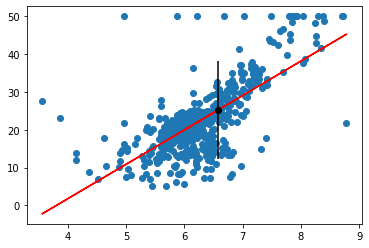

In [3]:
# linear regression prediction with prediction interval
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

data=data.values
# prepare data
x = data[:,5].reshape(-1,1)
y = data[:,13]

model= LinearRegression()
model=model.fit(x,y)
yhat=model.predict(x)

# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()

# Nonlinear regression prediction with prediction interval

R^2: 0.5441462975864797
Prediction Interval: 12.183
95% likelihood that the true value is between -1.783 and 22.583
True value: 18.203
R^2: 0.6872238518753775
Prediction Interval: 10.091
95% likelihood that the true value is between 0.309 and 20.491
True value: 16.845
R^2: 0.6095634642172136
Prediction Interval: 11.275
95% likelihood that the true value is between -0.875 and 21.675
True value: 16.790


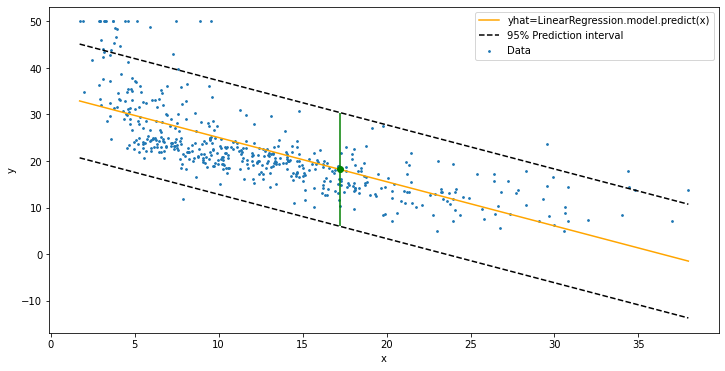

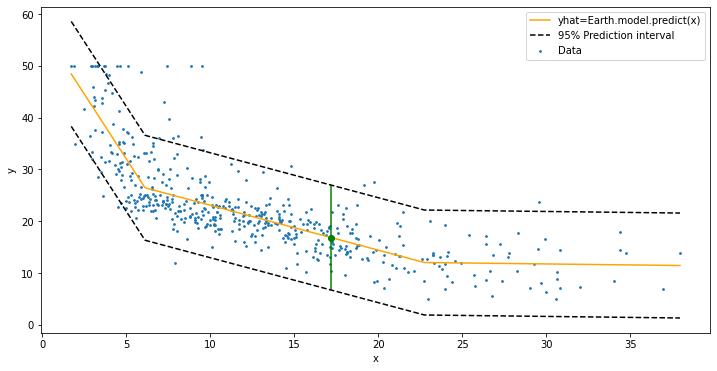

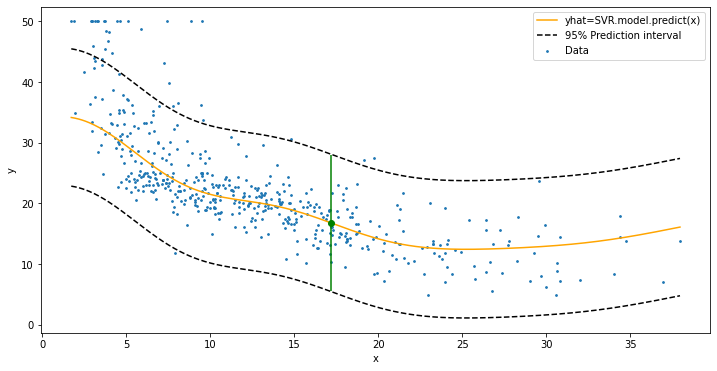

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pyearth import Earth
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from numpy import sum as arraysum
np.warnings.filterwarnings('ignore')

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

data=data.values
# prepare data
x = data[:,12].reshape(-1,1)
y = data[:,13]
n = len(y)

def predband(x, xd, yd, model, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = 0  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - model.predict(xd)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = model.predict(x)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb


models=[LinearRegression(),Earth(), SVR()]

for model in models:

    model= model
    model=model.fit(x,y)
    yhat=model.predict(x)

    # compute r^2
    r2 = 1.0-(sum((y-yhat)**2)/((n-1.0)*np.var(y,ddof=1)))
    print('R^2: ' + str(r2))



    # calculate regression confidence interval
    px =  np.linspace(min(x), max(x), len(x))
    # aproximated func
    py = model.predict(px)
    lpb, upb = predband(px, x, y, model, conf=0.95)

    # define new input, expected value and prediction
    x_in = x[380]
    y_out = y[380]
    yhat_out = yhat[380]
    # estimate stdev of yhat
    sum_errs = arraysum((y - yhat)**2)
    stdev = sqrt(1/(len(y)-2) * sum_errs)
    # calculate prediction interval
    interval = 1.96 * stdev


    fig=plt.figure(figsize=(12,6))

    # plot data
    plt.scatter(x, y, s=3, label='Data')

    # plot the regression
    plt.plot(px, py, c='orange', label='yhat='+str(model)[:-2]+'.model.predict(x)')
    plt.plot(px, lpb[0], 'k--',label='95% Prediction interval')
    plt.plot(px, upb[0], 'k--')
    plt.errorbar(x_in, yhat_out, yerr=interval, color='green', fmt='o')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='best')

    print('Prediction Interval: %.3f' % interval)
    lower, upper = y_out - interval, y_out + interval
    print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
    print('True value: %.3f' % yhat_out)
   
    # save and show figure
    #plt.savefig('regression.png')